## Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
from scipy.stats import boxcox
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline


In [2]:
# Set the resolution of the plotted figures
plt.rcParams['figure.dpi']=200

# Setting Background Colour and grids
sns.set(rc = {'axes.facecolor': '#faded9'} , style = 'darkgrid')

## Read Dataset

In [3]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1



| Variable | Description |
|----------|-------------|
| age      | Age of the patient in years |
| sex      | Gender of the patient (1 = male, 0 = female) |
| cp       | Chest pain type: 0=Typical angina, 1=Atypical angina, 2=Non-anginal pain, 3=Asymptomatic |
| trestbps | Resting blood pressure in mm Hg |
| chol     | Serum cholesterol in mg/dl |
| fbs      | Fasting blood sugar > 120 mg/dl (1 = true, 0 = false) |
| restecg  | Resting electrocardiographic results( 0=Normal, 1=ST-T wave abnormality ,2=Showing definite left ventricular hypertrpoy)|
| thalach  | maximum Heart rate achieved during a stress test |
| exang    | exercise induced angina (1=Yes ,2=No) |
| oldpeak  | ST depression induced by exercise relative to rest|
| slope    | Slope of peak exercise ST segment (0=Upsloping , 1=Flat ,2=Downsloping) |
| ca       | Number of major vessels colored by fluroscopy |
|thal      | Thalium Stress test result (0=Normal , 1=Fixed defect ,2=Reversible defect,3=Not described )  |
| target   | Heart Disease status ( 0=no disease , 1=Disease Present)|

## Information of Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Inferences:

- **Number of Entries**: The dataset consists of **303 entries**, ranging from index 0 to 302.
- **Columns**: There are **14 columns** in the dataset corresponding to various attributes of the patients and results of tests.
- **Data Types**:
  - Most of the columns (13 out of 14) are of the `int64` data type.
  - Only the `oldpeak` column is of the `float64` data type.
- **Missing Values**: There don't appear to be any missing values in the dataset as each column has 303 non-null entries.


In [5]:
# Define continuous features
continuous_features = ['age','trestbps','chol','thalach','oldpeak']

# Features to be converted to object data types ( Initially float and int data type)
features_to_convert = [ ftr for ftr in df.columns if ftr not in continuous_features]

df[features_to_convert] = df[features_to_convert].astype('object')

df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
dtype: object

In [6]:
# description of columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


## Inferences:

- **`age`**: The average age of patients is approximately 54.4 years. Youngest age is 29 and oldest is 77.
- **`trestbps`**: The average rest BP of patients is approximately 131.62 mm Hg with values ranging from 94 to 200 mm Hg.
- **`chol`**: The average cholestrol level of patients is approximately 24.26 mg/dl with minimum of 126 and maximum of 564 mg/dl.
- **`thalach`**: The average maximum heart rate of patients is  149.65 with values ranging from 71 to 202.
-  **`oldpeak`**: The average ST depression induced by exercise relative to rest is about 1.04 with values ranging from 0 to 6.2.


In [7]:
# Description of categorical Features
df.describe(include = 'object').T

,count,unique,top,freq
sex,303,2,1,207
cp,303,4,0,143
fbs,303,2,0,258
restecg,303,3,1,152
exang,303,2,0,204
slope,303,3,2,142
ca,303,5,0,175
thal,303,4,2,166
target,303,2,1,165


## Inferences

- **sex** : There are two unique values, with females (denoted as 1) being the most frequent category, 
  occurring 207 times out of 303 entries.

- **cp** : Four unique types of chest pain are present. The most common type is "0", occurring 143 times.

- **fbs** : There are two categories, and the most frequent one is "0" 
  (indicating fasting blood sugar less than 120 mg/dl), which appears 258 times.

- **restecg** : Three unique results are present. The most common result is "1", appearing 152 times.

- **exang** : There are two unique values. The most frequent value is "0" 
  (indicating no exercise-induced angina), which is observed 204 times.

- **slope** : Three unique slopes are present. The most frequent slope type is "2", which occurs 142 times.

- **ca** : There are five unique values for the number of major vessels colored by fluoroscopy, 
  with "0" being the most frequent, appearing 175 times.

- **thal** : Four unique results are available. The most common type is "2" (indicating a reversible defect), 
  observed 166 times.

- **target** : Two unique values indicate the presence or absence of heart disease. 
  The value "1" (indicating the presence of disease) is most frequent, observed in 165 entries.


## Exploratory Data Analysis (EDA)

### Univariate Analysis

#### Numerical features

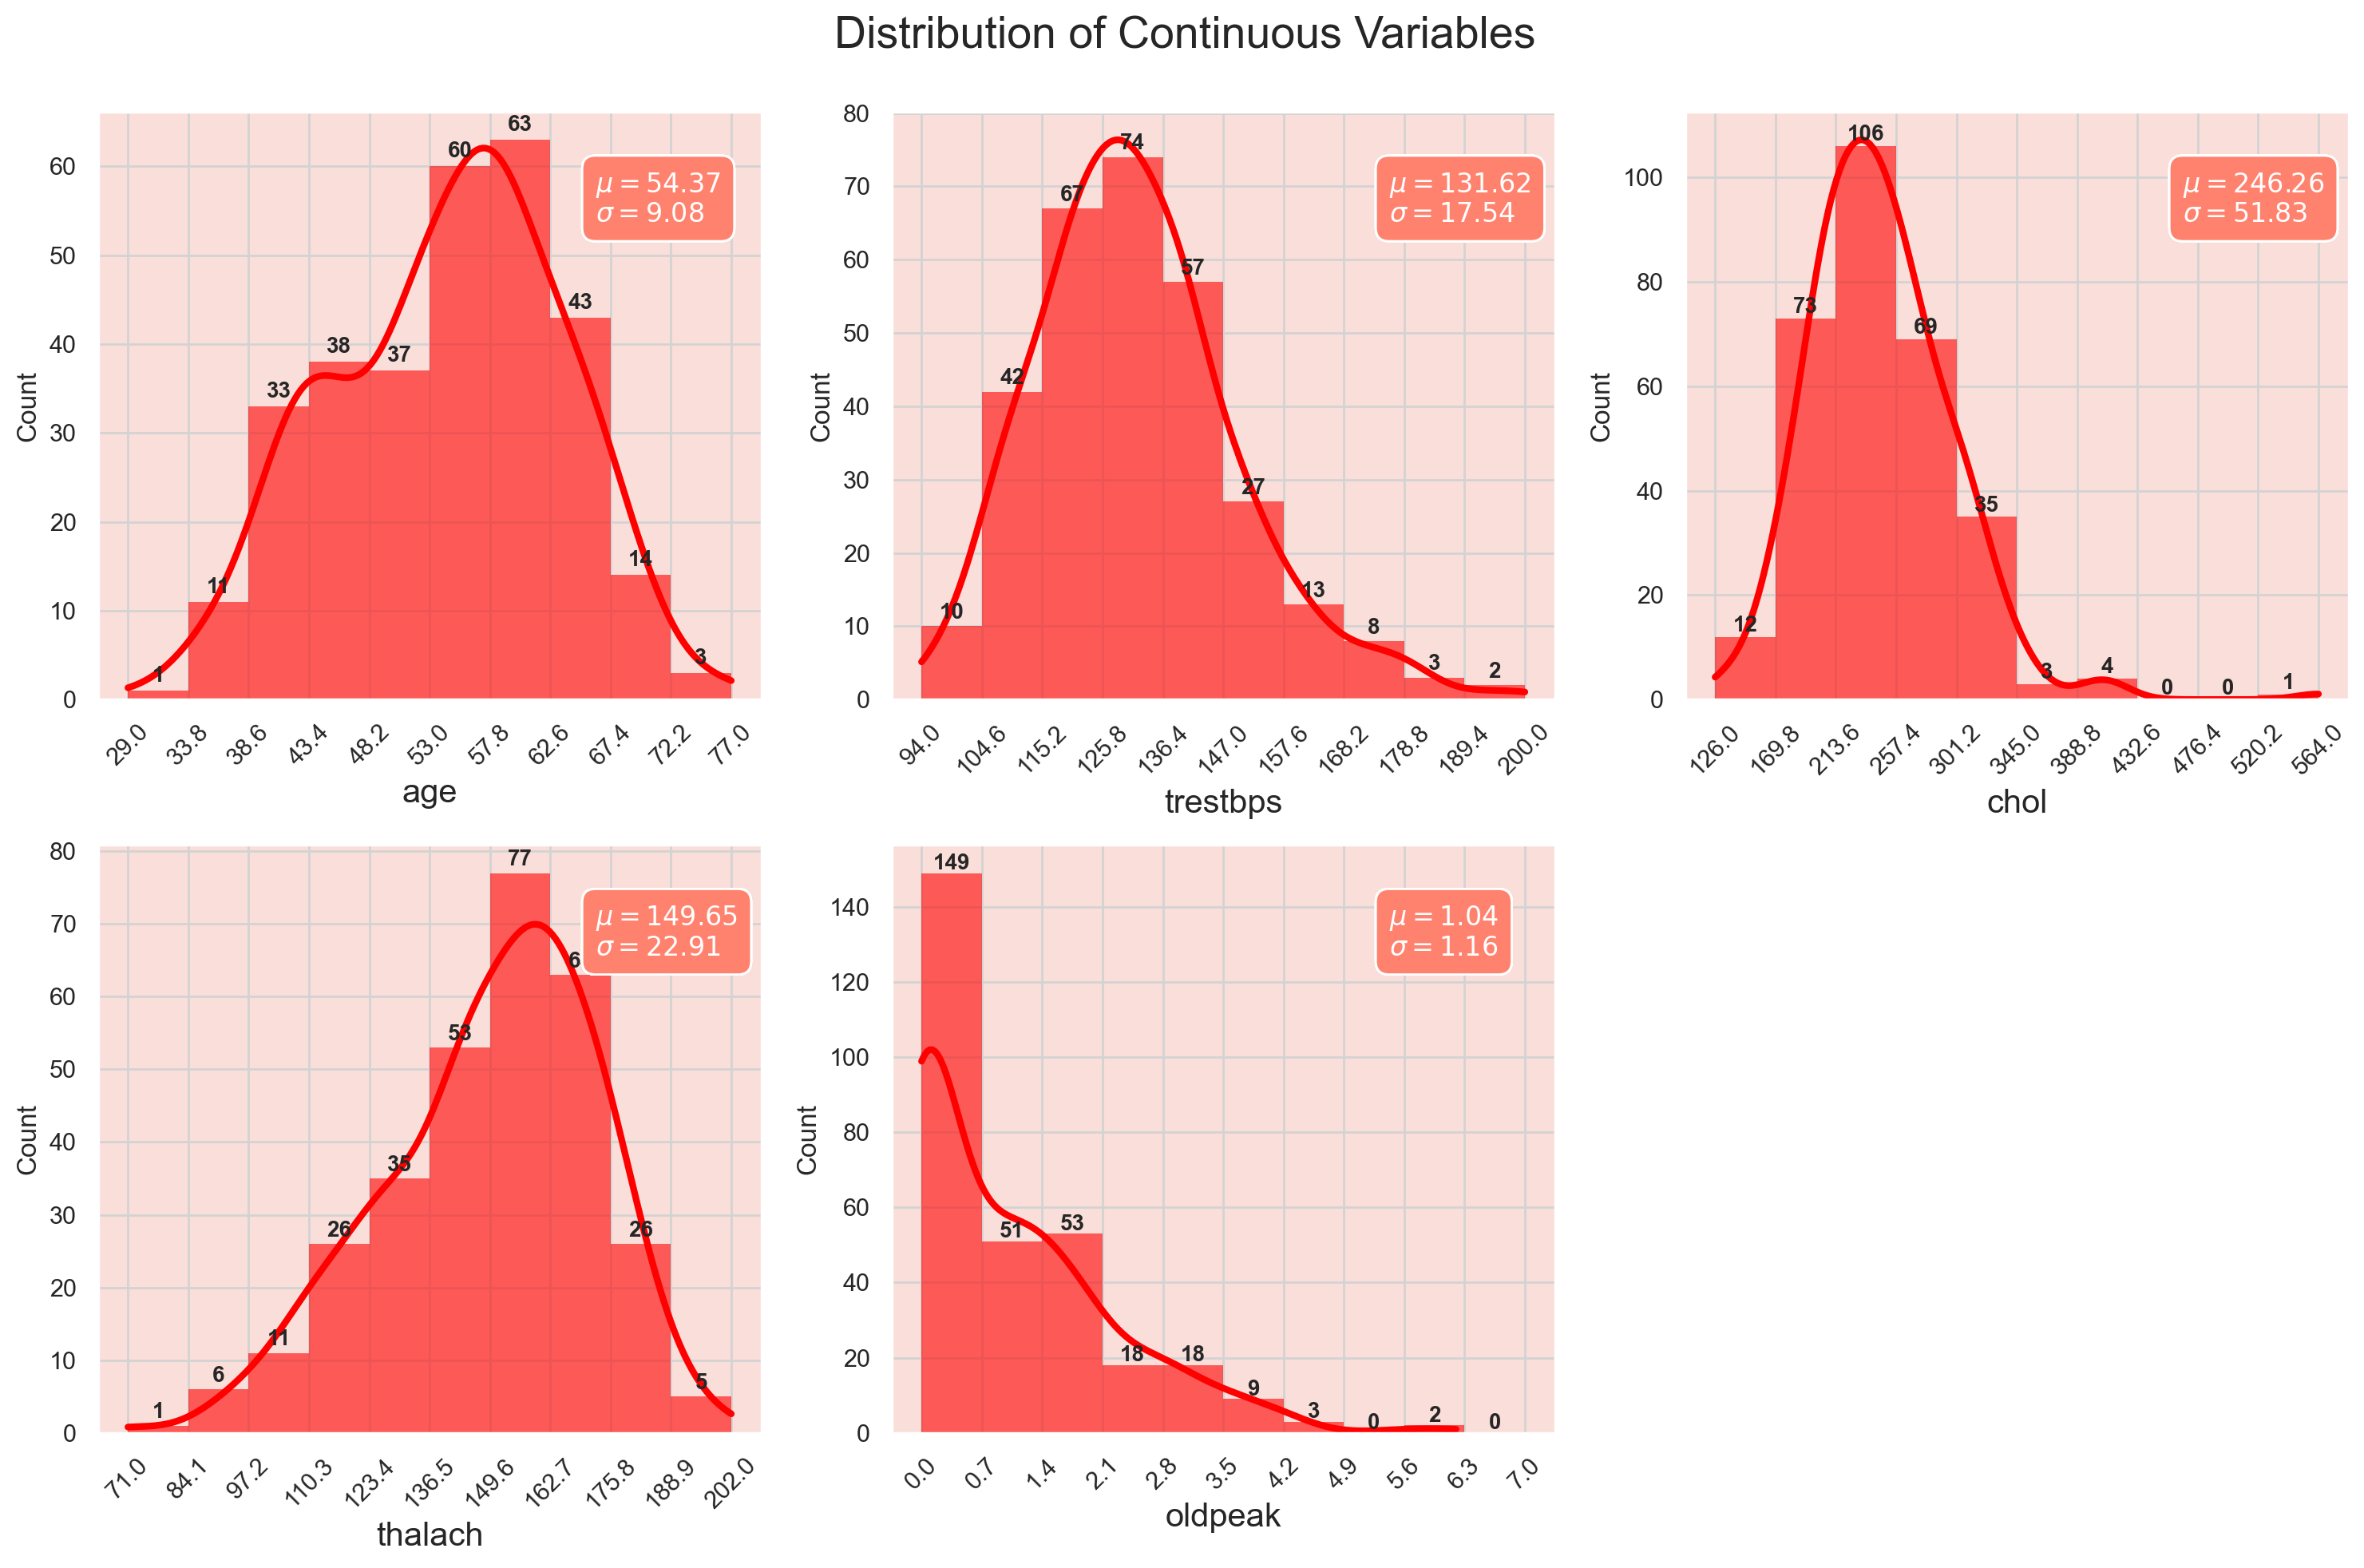

In [8]:
df_continuous = df[continuous_features]

# Subplot
fig , ax = plt.subplots(nrows = 2 ,ncols = 3,figsize=(15,10))

for i,col in enumerate(df_continuous.columns):
    x = i // 3
    y = i % 3

    values , bin_edges = np.histogram(df_continuous[col] , range = (np.floor(df_continuous[col].min()) , np.ceil(df_continuous[col].max())))

    graph = sns.histplot(data = df_continuous , x = col , bins = bin_edges , kde =True , ax = ax[x,y] , edgecolor='none' , color = 'red' , alpha =0.6 , line_kws={'lw':3})

    ax[x,y].set_xlabel(col,fontsize = 15)
    ax[x,y].set_ylabel("Count" , fontsize = 12)
    ax[x,y].set_xticks(np.round(bin_edges,1))
    ax[x,y].set_xticklabels(ax[x,y].get_xticks() ,rotation = 45)
    ax[x,y].grid(color = 'lightgrey')

    for j , p in enumerate(graph.patches):
        ax[x,y].annotate('{}'.format(p.get_height()) ,(p.get_x() + p.get_width() /2 , p.get_height() + 1),ha='center' , fontsize=10,fontweight='bold')

        textstr = '\n'.join((r'$\mu=%.2f$' % df_continuous[col].mean(),r'$\sigma=%.2f$' % df_continuous[col].std()
                            ))
        ax[x,y].text(0.75 , 0.9 ,textstr,transform=ax[x,y].transAxes , fontsize =12 , verticalalignment = 'top',color='white',bbox = dict(boxstyle = 'round',facecolor = '#ff826e' ,edgecolor = 'white',pad = 0.5))

ax[1,2].axis('off')
plt.suptitle('Distribution of Continuous Variables',fontsize = 20)
plt.tight_layout()
plt.subplots_adjust(top = 0.92)
plt.show()
        
    
    

## Inferences:

- **Age (age)** : The distribution is somewhat uniform, but there's a slight concentration around the late 50s. 
  The mean age is approximately **54.37 years** with a standard deviation of **9.08 years**.

- **Resting Blood Pressure (trestbps)** : The resting blood pressure for most individuals is concentrated 
  around **120–140 mm Hg**, with a mean of approximately **131.62 mm Hg** and a standard deviation of **17.54 mm Hg**.

- **Serum Cholesterol (chol)** : Most individuals have cholesterol levels between **200 and 300 mg/dl**. 
  The mean cholesterol level is around **246.26 mg/dl** with a standard deviation of **51.83 mg/dl**.

- **Maximum Heart Rate Achieved (thalach)** : The majority of the individuals achieve a heart rate 
  between **140 and 170 bpm** during a stress test. The mean heart rate achieved is approximately 
  **149.65 bpm** with a standard deviation of **22.91 bpm**.

- **ST Depression Induced by Exercise (oldpeak)** : Most of the values are concentrated towards **0**, 
  indicating that many individuals did not experience significant ST depression during exercise. 
  The mean ST depression value is **1.04** with a standard deviation of **1.16**.


#### Categorical features

In [9]:
categorical_features = df.columns.difference(continuous_features)
df_categorical = df[categorical_features]

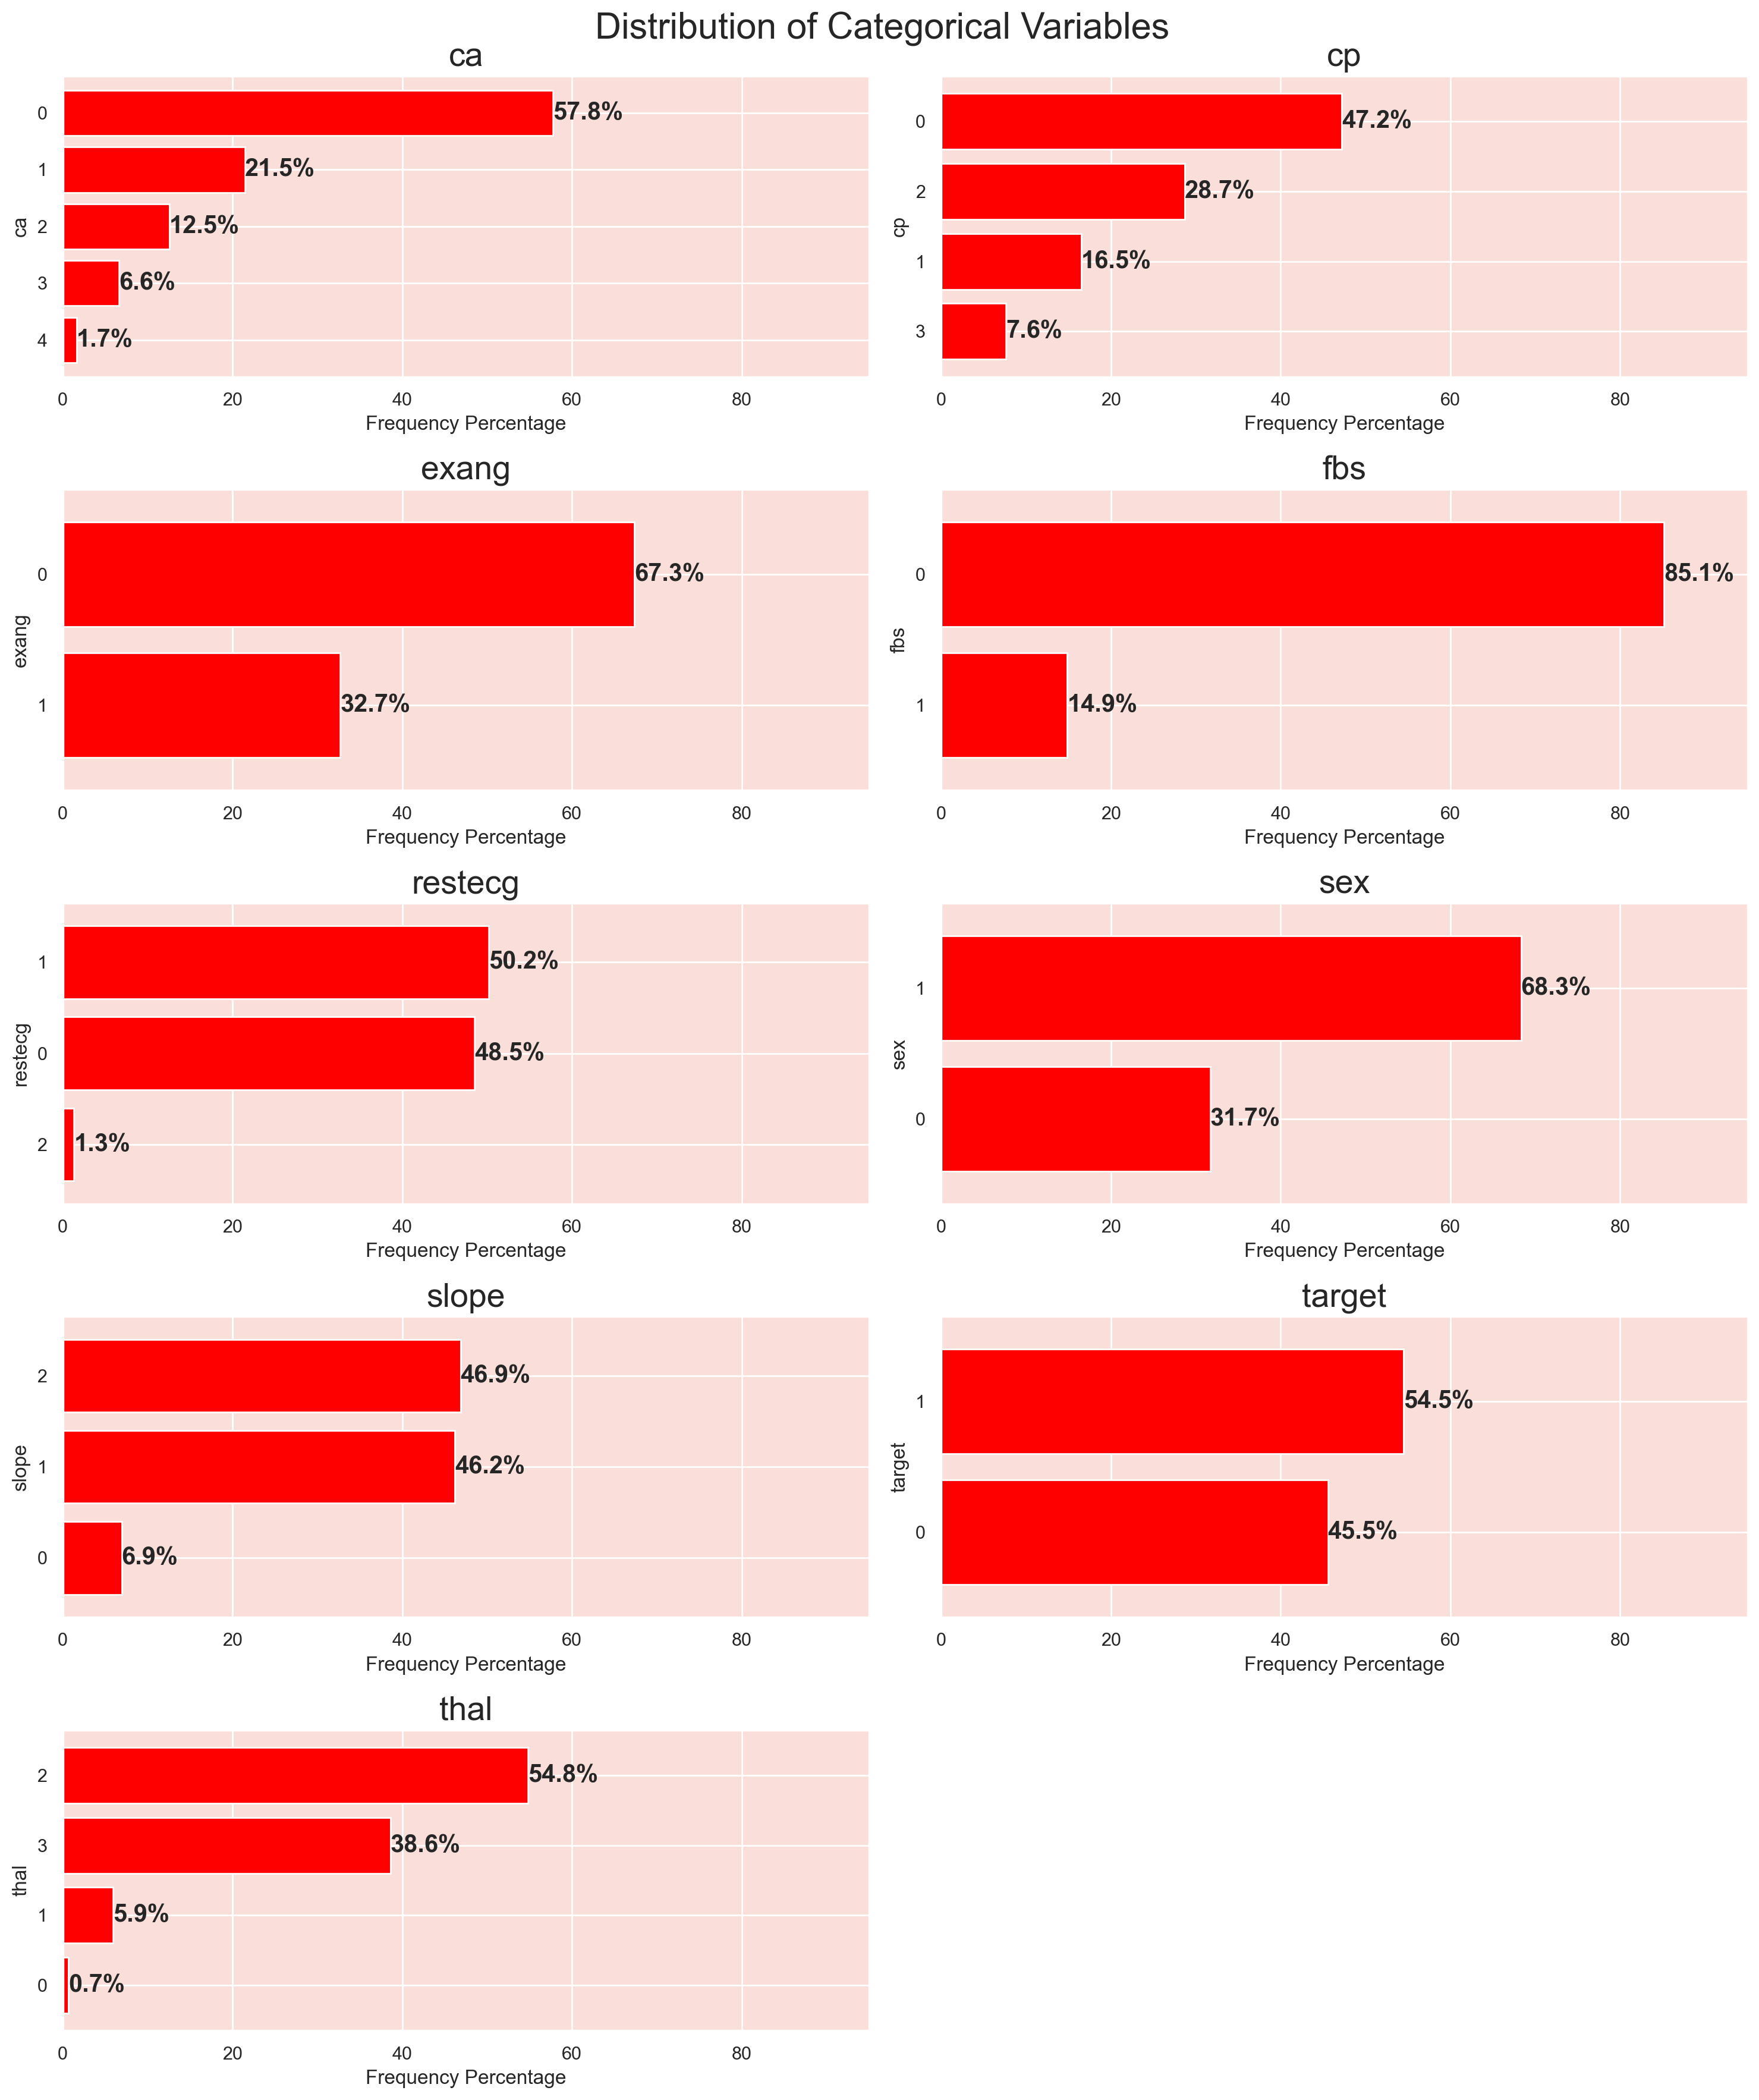

In [10]:
# Subplot
fig , ax = plt.subplots(nrows = 5 ,ncols = 2,figsize=(15,18))

for i,col in enumerate(categorical_features):
    row = i // 2
    col_idx = i % 2

    value_counts = df[col].value_counts(normalize = True).mul(100).sort_values()

    value_counts.plot(kind = 'barh', ax = ax[row,col_idx] , width = 0.8 , color ='red')

    for index , value in enumerate(value_counts):
        ax[row,col_idx].text(value , index,str(round(value,1)) +'%' , fontsize = 15,weight='bold',va='center')

    ax[row,col_idx].set_xlim([0,95])
    ax[row,col_idx].set_xlabel('Frequency Percentage',fontsize = 12)
    ax[row,col_idx].set_title(f'{col}' , fontsize = 20)

   

ax[4,1].axis('off')
plt.suptitle('Distribution of Categorical Variables',fontsize = 22)
plt.tight_layout()
plt.subplots_adjust(top = 0.95)
plt.show()


## Inferences:

- **Gender (sex)** : The dataset is predominantly female, constituting a significant majority.

- **Type of Chest Pain (cp)** : The dataset shows varied chest pain types among patients. 
  Type 0 (Typical angina) seems to be the most prevalent, but the exact distribution among the types 
  can be inferred from the bar plots.

- **Fasting Blood Sugar (fbs)** : A significant majority of the patients have their fasting blood sugar 
  level below 120 mg/dl, indicating that high blood sugar is not a common condition in this dataset.

- **Resting Electrocardiographic Results (restecg)** : The results show varying resting electrocardiographic outcomes, 
  with certain types being more common than others. The exact distribution can be gauged from the plots.

- **Exercise-Induced Angina (exang)** : A majority of the patients do not experience exercise-induced angina, 
  suggesting that it might not be a common symptom among the patients in this dataset.

- **Slope of the Peak Exercise ST Segment (slope)** : The dataset shows different slopes of the peak exercise ST segment. 
  A specific type might be more common, and its distribution can be inferred from the bar plots.

- **Number of Major Vessels Colored by Fluoroscopy (ca)** : Most patients have fewer major vessels 
  colored by fluoroscopy, with "0" being the most frequent.

- **Thalium Stress Test Result (thal)** : The dataset displays a variety of thalium stress test results. 
  One particular type seems to be more prevalent, but the exact distribution can be seen in the plots.

- **Presence of Heart Disease (target)** : The dataset is nearly balanced in terms of heart disease presence, 
  with about **54.5%** having it and **45.5%** not having it.


### Bivariate Analysis

#### Numerical Features vs Target

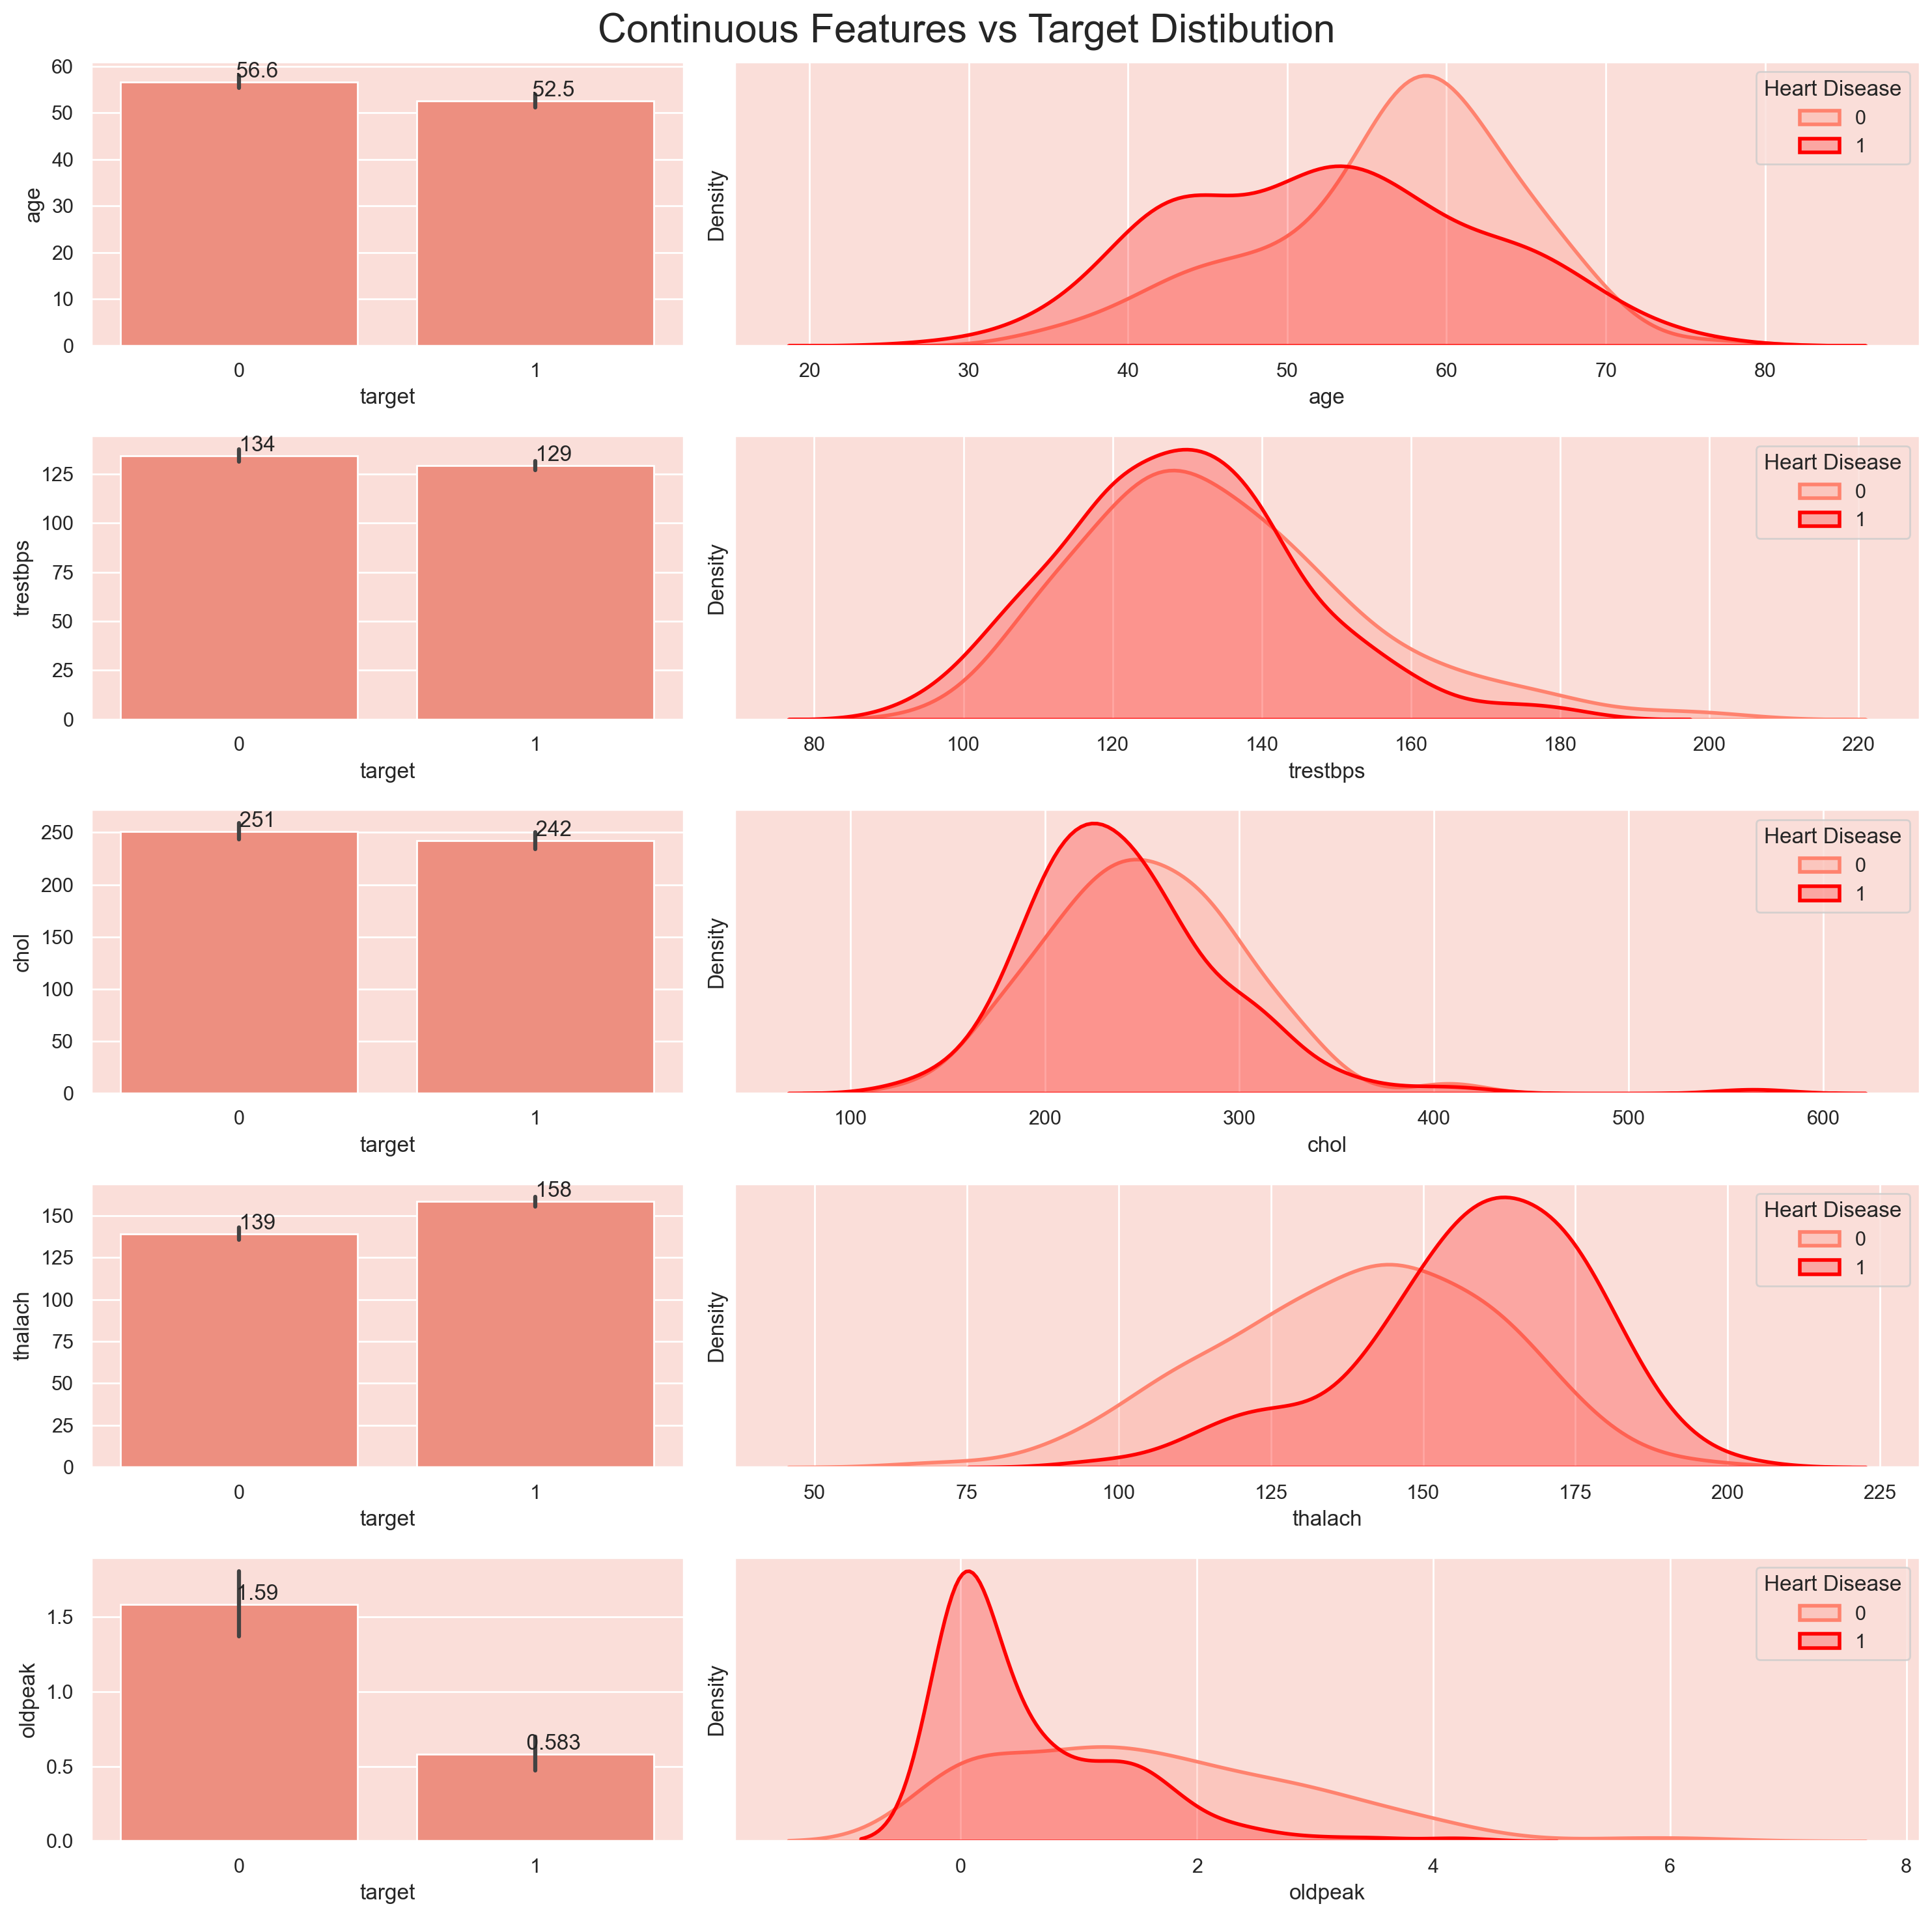

In [11]:
# Setting color Palette
sns.set_palette(['#ff826e','red'])

# Subplots
fig , ax = plt.subplots(len(continuous_features),2,figsize=(15,15) , gridspec_kw = {'width_ratios':[1,2]})

for i,col in enumerate(continuous_features):
    graph = sns.barplot(data = df , x='target',y = col,ax = ax[i,0])

    sns.kdeplot(data = df[df["target"]==0] , x =col,fill=True,linewidth =2,ax = ax[i,1] , label='0')
    sns.kdeplot(data = df[df["target"]==1] , x =col,fill=True,linewidth =2,ax = ax[i,1] , label='1')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title = "Heart Disease" ,loc = 'upper right')

    for cont in graph.containers:
        graph.bar_label(cont , fmt = '      %.3g')

plt.suptitle('Continuous Features vs Target Distibution',fontsize = 22)
plt.tight_layout()
plt.show()

## Inferences:

- **Age (age)**: The distributions show a slight shift with patients having heart disease being a bit younger on average than those without. The mean age of patients without heart disease is higher.
- **Resting Blood Pressure (trestbps)**: Both categories show overlapping distributions in the KDE plot, with nearly identical mean values, indicating limited differentiating power for this feature.
- **Serum Cholesterol (chol)**: The distributions of cholesterol levels for both categories are quite close, but the mean cholesterol level for patients with heart disease is slightly lower.
- **Maximum Heart Rate Achieved (thalach)**: There's a noticeable difference in distributions. Patients with heart disease tend to achieve a higher maximum heart rate during stress tests compared to those without.
- **ST Depression (oldpeak)**: The ST depression induced by exercise relative to rest is notably lower for patients with heart disease. The distribution peaks near zero, whereas the non-disease category has a wider spread.


#### Categorical Features Vs Target Variable

In [12]:
categorical_features = [ftr for ftr in categorical_features if ftr !='target']

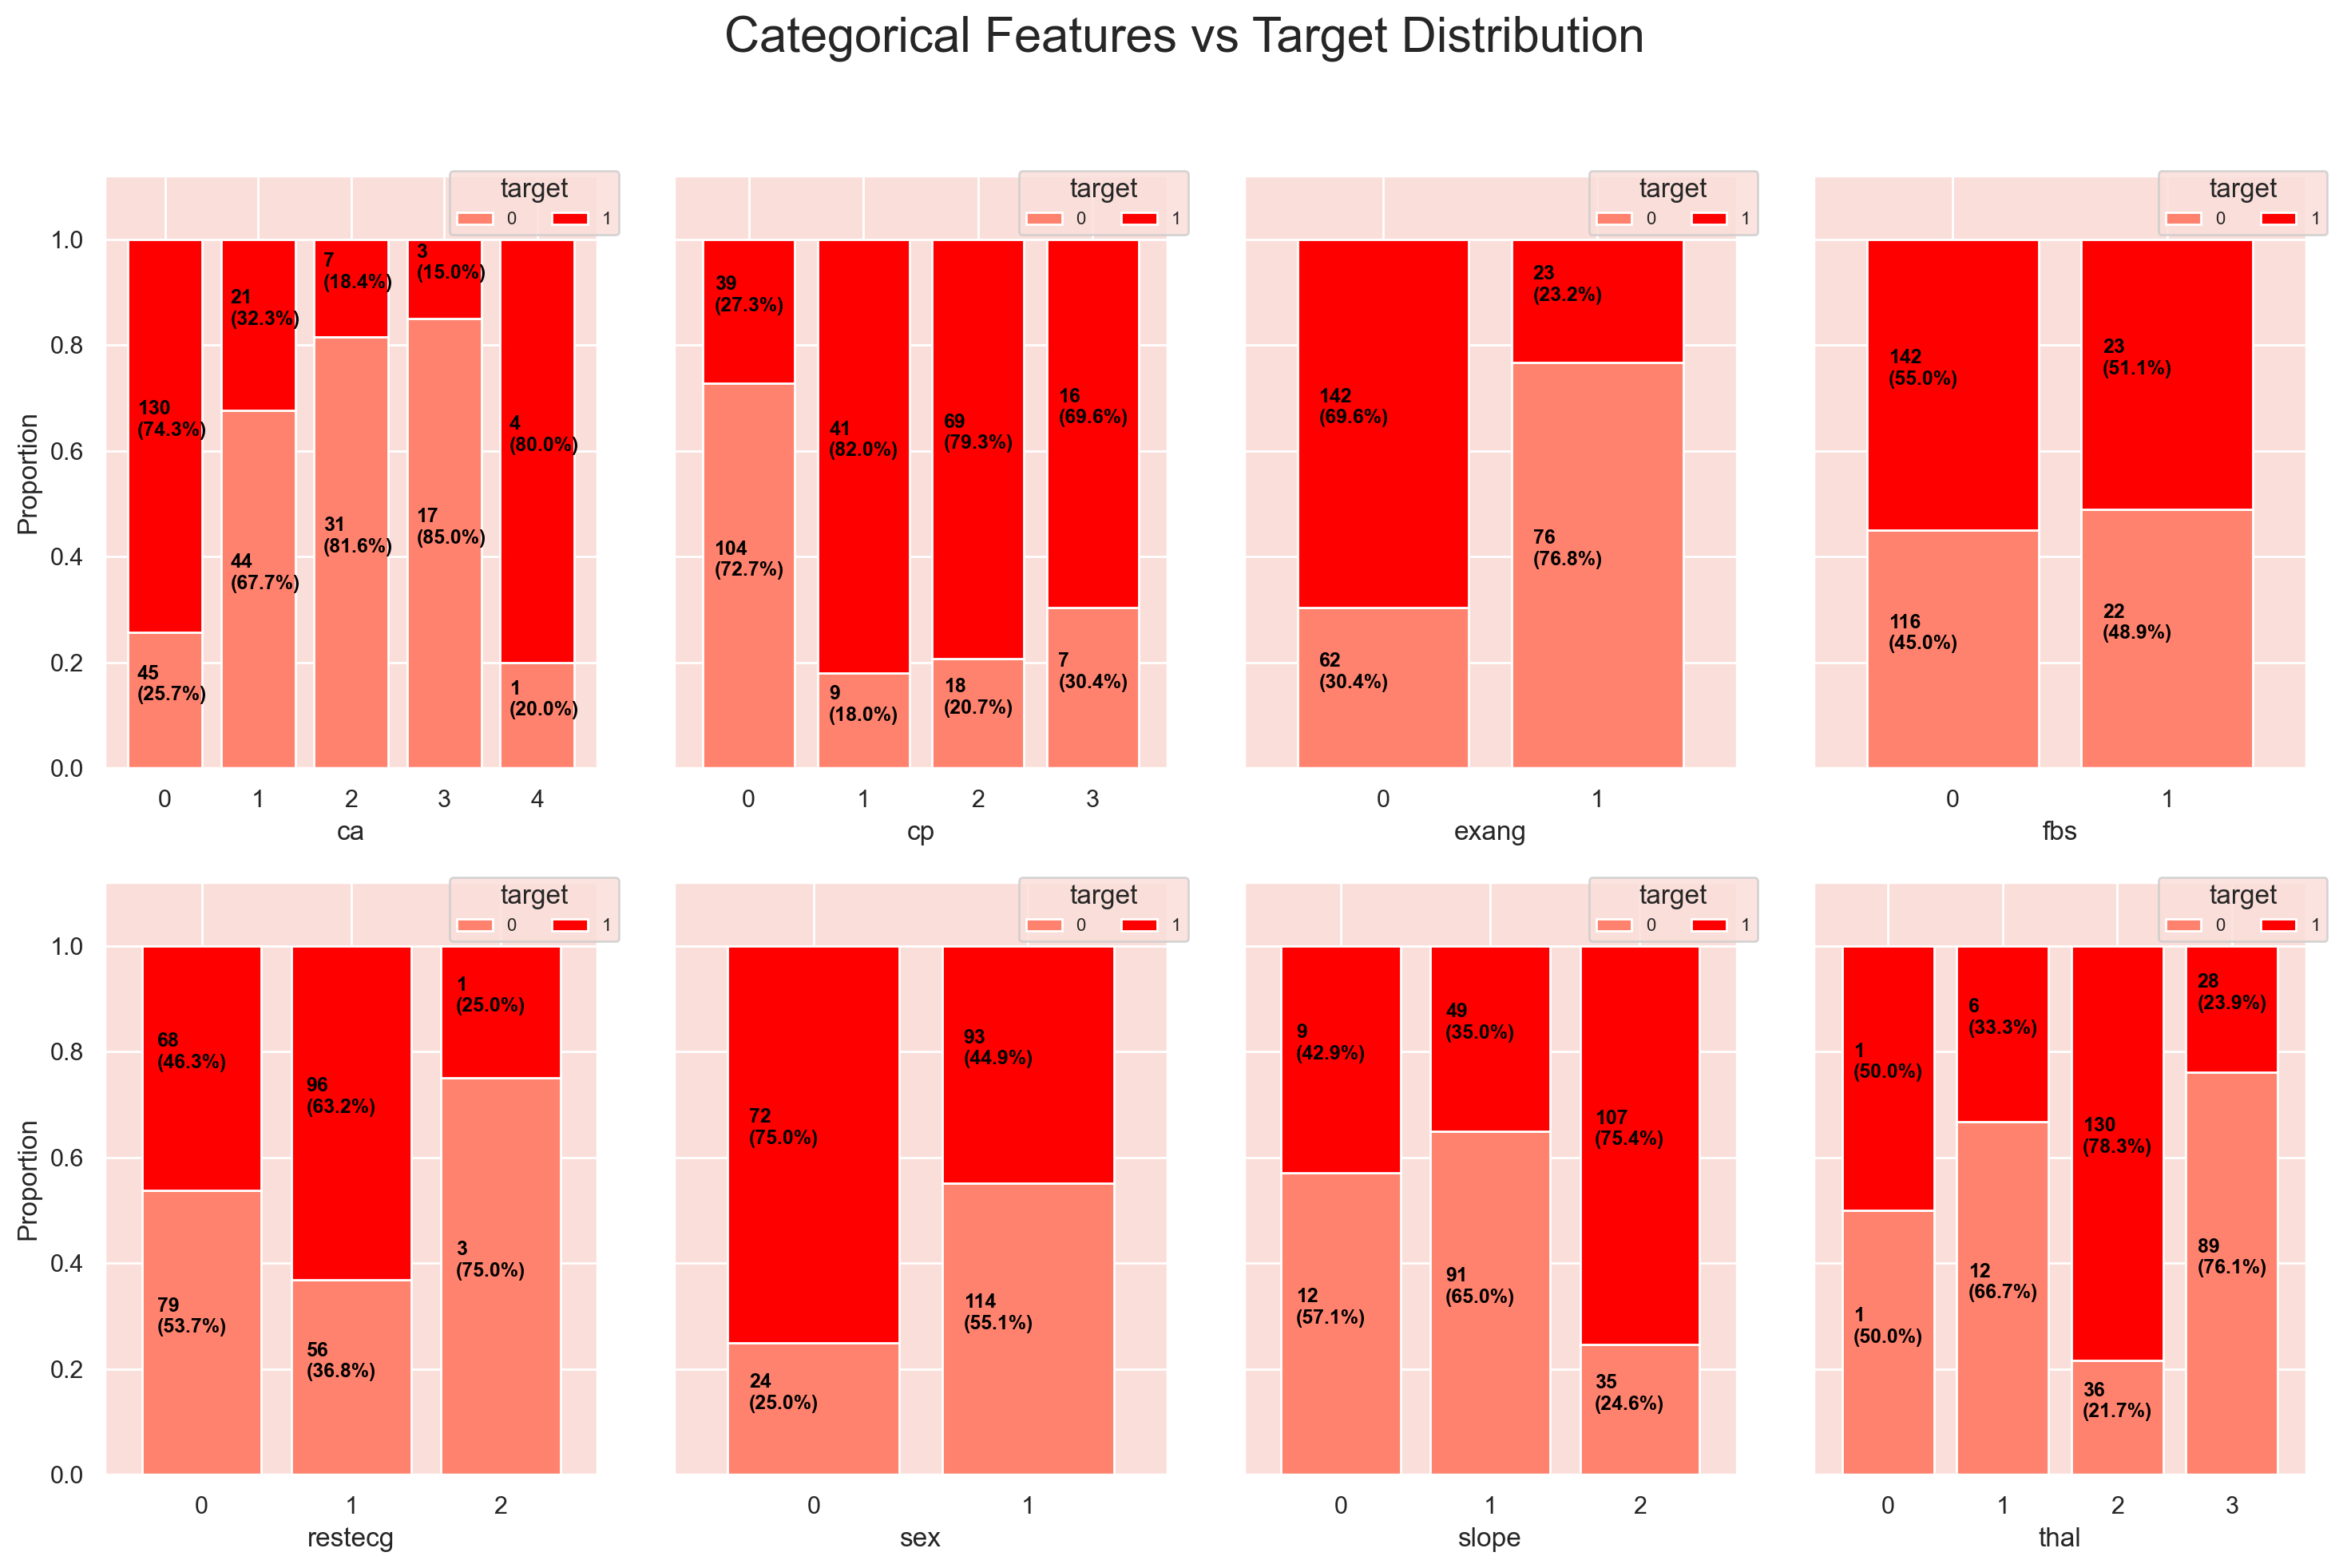

In [13]:
#  Subplots
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))

for i, col in enumerate(categorical_features):
    cross_tab = pd.crosstab(index=df[col], columns=df['target'])  # Cross Tabulation
    cross_tab_prop = pd.crosstab(index=df[col], columns=df['target'], normalize='index')

    cmp = ListedColormap(['#ff826e', 'red'])

    # subplot positions
    x, y = i // 4, i % 4

    # Plot stacked bar chart
    cross_tab_prop.plot(
        kind='bar',
        ax=ax[x, y],
        stacked=True,
        width=0.8,
        colormap=cmp,
        legend=False,
        ylabel='Proportion',
        sharey=True
    )

    # Annotate bars with count and proportion
    for idx, val in enumerate(cross_tab.index.values):
        cumulative = 0
        for proportion, count in zip(cross_tab_prop.loc[val], cross_tab.loc[val]):
            y_location = cumulative + (proportion / 2)
            ax[x, y].text(
                x=idx - 0.3,
                y=y_location,
                s=f'{count}\n({np.round(proportion * 100, 1)}%)',
                color="black",
                fontsize=9,
                fontweight="bold"
            )
            cumulative += proportion

    # Legend and styling
    ax[x, y].legend(title='target', loc=(0.7, 0.9), fontsize=8, ncol=2)
    ax[x, y].set_ylim([0, 1.12])
    ax[x, y].set_xticklabels(ax[x, y].get_xticklabels(), rotation=0)

# Figure title and layout
fig.suptitle('Categorical Features vs Target Distribution', fontsize=22)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## Inferences
- **Number of Major Vessels (ca)**: The majority of patients with heart disease have fewer major vessels colored by fluoroscopy. As the number of colored vessels increases, the proportion of patients with heart disease tends to decrease. Especially, patients with 0 vessels colored have a higher proportion of heart disease presence.
- **Chest Pain Type (cp)**: Different types of chest pain present varied proportions of heart disease. Notably, types 1, 2, and 3 have a higher proportion of heart disease presence compared to type 0. This suggests the type of chest pain can be influential in predicting the disease.
- **Exercise Induced Angina (exang)**: Patients who did not experience exercise induced angina (0) show a higher proportion of heart disease presence compared to those who did (1). This feature seems to have a significant impact on the target.
- **Fasting Blood Sugar (fbs)**: The distribution between those with fasting blood sugar > 120 mg/dl (1) and those without (0) is relatively similar, suggesting `fbs` might have limited impact on heart disease prediction.
- **Resting Electrocardiographic Results (restecg)**: Type 1 displays a higher proportion of heart disease presence, indicating that this feature might have some influence on the outcome.
- **Sex (sex)**: Females (1) exhibit a lower proportion of heart disease presence compared to males (0). This indicates gender as an influential factor in predicting heart disease.
- **Slope of the Peak Exercise ST Segment (slope)**: The slope type 2 has a notably higher proportion of heart disease presence, indicating this feature as a significant predictor.
- **Thalium Stress Test Result (thal)**: The reversible defect category (2) has a higher proportion of heart disease presence compared to other categories, emphasizing its importance in prediction.


## Data Preprocessing

In [14]:
# Check for missing values
df.isnull().sum().sum()

np.int64(0)

In [15]:
# Outlier Treatment
continuous_features

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [16]:
Q1 = df[continuous_features].quantile(0.25)
Q3 = df[continuous_features].quantile(0.75)

# IntraQuartile Range
IQR = Q3 - Q1
outliers_count_specified = ((df[continuous_features] < (Q1 - 1.5 * IQR)) | (df[continuous_features] > (Q3 +1.5*IQR))).sum()

outliers_count_specified

age         0
trestbps    9
chol        5
thalach     1
oldpeak     5
dtype: int64

##  Categorical Feature Encoding

In [17]:
# Implement one hot encoding
# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=['cp', 'restecg', 'thal'], drop_first=True)

# Convert all bool columns to int
bool_cols = df_encoded.select_dtypes(include='bool').columns

df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

# Convert other features if needed
features_to_convert = ['sex', 'fbs', 'exang', 'slope', 'ca', 'target']
for ftr in features_to_convert:
    df_encoded[ftr] = df_encoded[ftr].astype(int)


df_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,0,1,0,0,1,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,0,1,0,1,0,1,0,0,1,0
2,41,0,130,204,0,172,0,1.4,2,0,1,1,0,0,0,0,0,1,0
3,56,1,120,236,0,178,0,0.8,2,0,1,1,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0.6,2,0,1,0,0,0,1,0,0,1,0


### Transfroming Skewed Features

In [18]:
# Define X and Y
X = df_encoded.drop('target' , axis = 1)
y = df_encoded['target']

In [19]:
# Splitting into training and Testing data
X_train ,  X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 0,stratify=y)

In [20]:
# Applying Box Cox

# Adding a small constant
X_train['oldpeak'] = X_train['oldpeak'] +0.001
X_test['oldpeak'] = X_test['oldpeak'] +0.001

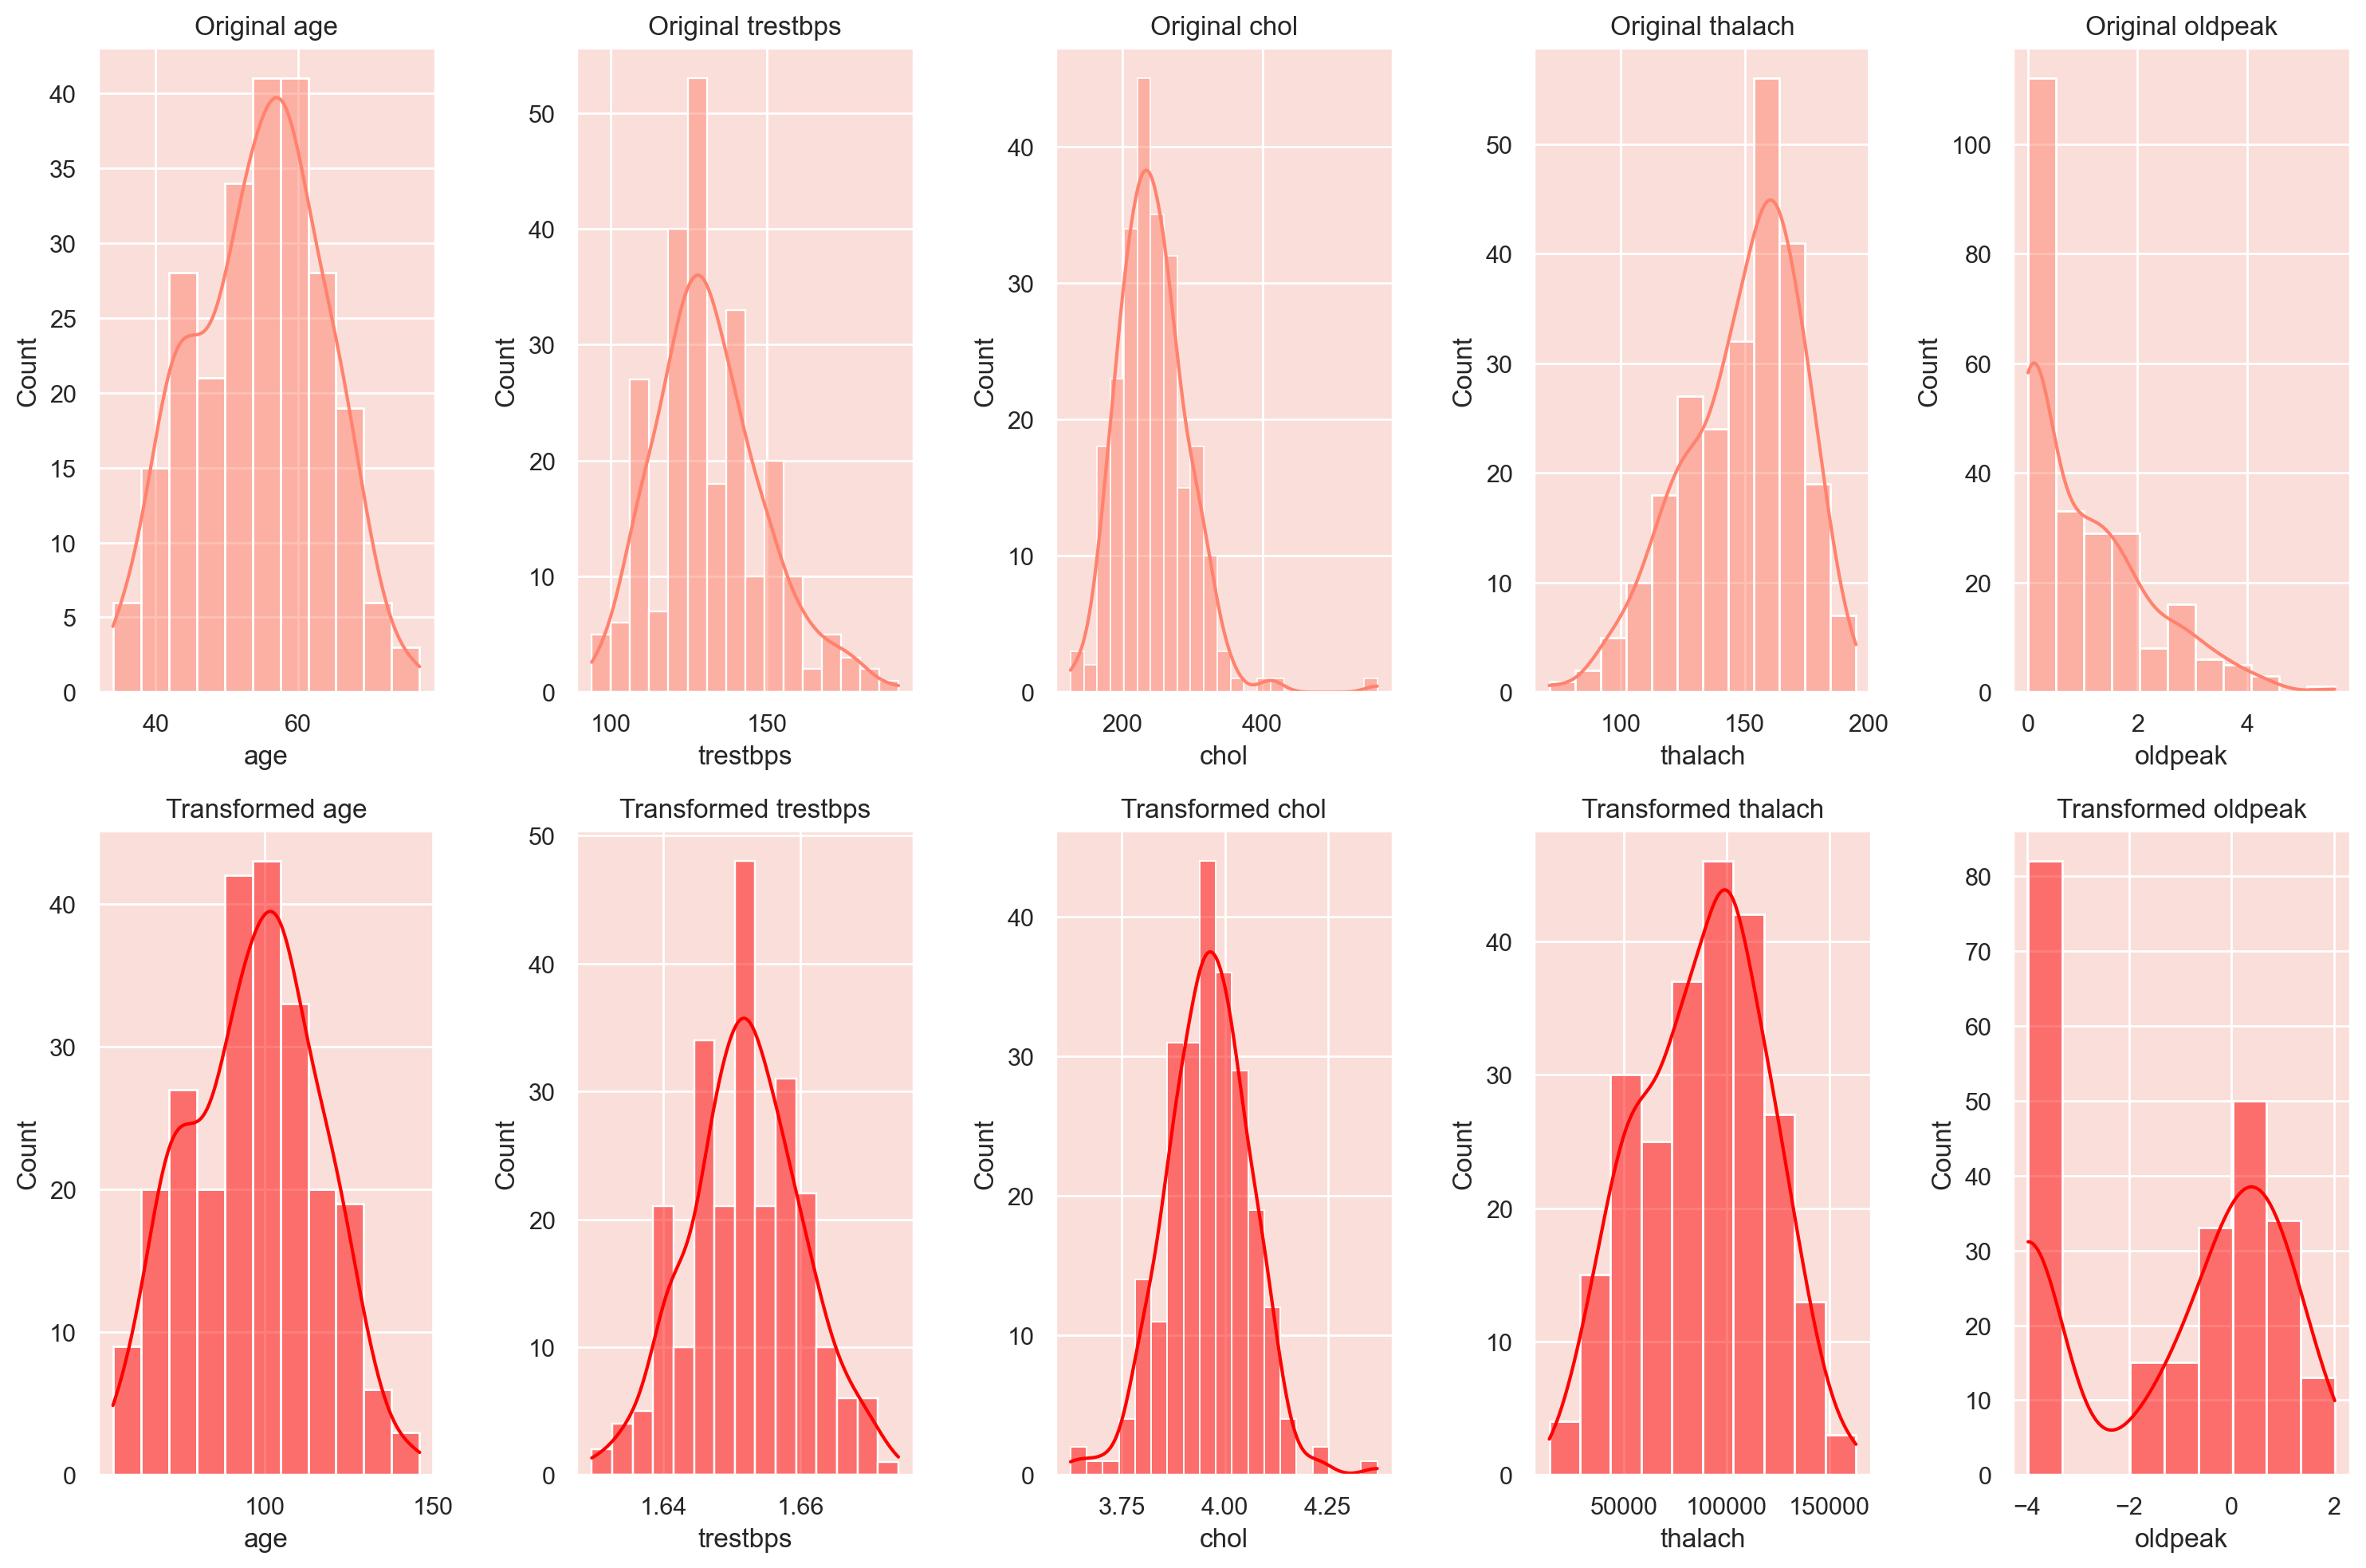

In [21]:
# Original Distribution
fig , ax = plt.subplots(2,5,figsize=(15,10))

for i, col in enumerate(continuous_features):
    sns.histplot(X_train[col],kde = True , ax = ax[0,i] , color ='#ff826e').set_title(f'Original {col}')

# Box - Cox

lambdas={}

for i,col in enumerate(continuous_features):
    if X_train[col].min()>0:
        X_train[col],lambdas[col] = boxcox(X_train[col])

        X_test[col] = boxcox(X_test[col] , lmbda = lambdas[col])
        sns.histplot(X_train[col] , kde = True , ax =ax[1,i] , color = 'red').set_title(f'Transformed {col}')
    else:
         sns.histplot(X_train[col] , kde = True , ax =ax[1,i] , color = 'green').set_title(f'Transformed {col}')

fig.tight_layout()
plt.show()

## Decision Tree Model

In [22]:
# Define DT model
dt_base = DecisionTreeClassifier(random_state = 0 )

In [23]:
# Hyperparameter Tuning
def tune_clf_hyperparameters(clf , param_grid,X_train , y_train , scoring = 'recall' , n_splits =3):

    cv = StratifiedKFold(n_splits = n_splits , shuffle = True , random_state = 0) # Cross Validation object using SartifiedKFold

    clf_grid = GridSearchCV(clf , param_grid , cv = cv , scoring = scoring , n_jobs = -1) # GridSearchCV

    clf_grid.fit(X_train ,y_train)

    # Best parameters :
    best_parameters = clf_grid.best_params_

    return clf_grid.best_estimator_ , best_parameters


# This function can be used for any type of Models. It uses GridSearchCVand StartifiedKFold for evaluating different combinations of hyperparameters.

In [24]:
# Hyperparameter Grid for DT
param_grid_dt = {
    'criterion':['gini','entropy'],
    'max_depth':[2,3],
    'min_samples_split':[2,3,4],
    'min_samples_leaf':[1,2]
}

In [25]:
best_dt , best_dt_hyperparams = tune_clf_hyperparameters(dt_base,param_grid_dt,X_train,y_train)

In [26]:
# Priniting best Params
print('Decision Tree Best Parameters : \n',best_dt_hyperparams)

Decision Tree Best Parameters : 
 {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}


## Decision Tree Model evaluation

In [27]:
# Training Performance
print(classification_report(y_train,best_dt.predict(X_train)))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       110
           1       0.78      0.77      0.78       132

    accuracy                           0.76       242
   macro avg       0.76      0.76      0.76       242
weighted avg       0.76      0.76      0.76       242



In [28]:
# Testing Performance
print(classification_report(y_test,best_dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75        28
           1       0.78      0.85      0.81        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



In [29]:
# Comparision of all models
def evaluate_model(model,X_test,y_test,model_name):
    y_pred = model.predict(X_test)
    report = classification_report(y_test,y_pred,output_dict = True)

    # Metrics
    metrics = {
    "precision_0":report["0"]["precision"],
    "precision_1":report["1"]["precision"],
    "recall_0": report["0"]["recall"],
    "recall_1": report["1"]["recall"],
    "f1_0":report["0"]["f1-score"],
    "f1_1":report["1"]["f1-score"],
    "macro_avg_precision":report["macro avg"]["precision"],
    "macro_avg_recall":report["macro avg"]["recall"],
    "macro_avg_f1":report["macro avg"]["f1-score"],
    "accuracy":accuracy_score(y_test,y_pred)
    }

    df = pd.DataFrame(metrics , index = [model_name]).round(2)

    return df

In [30]:
dt_evaluation = evaluate_model(best_dt , X_test,y_test,'DT')
dt_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
DT,0.8,0.78,0.71,0.85,0.75,0.81,0.79,0.78,0.78,0.79


## Random Forest model

In [31]:
# Define
rf_base = RandomForestClassifier(random_state = 0)

In [32]:
# Hyperparameter Tuning
param_grid_rf = {
    'n_estimators':[10,30,50,70,100],
    'criterion':['gini','entropy'],
    'max_depth': [2,3,4],
    'min_samples_split': [2,3,4,5],
    'min_samples_leaf': [1,2,3],
    'bootstrap': [ True ,False]
}
    

In [33]:
best_rf , best_rf_hyperparams = tune_clf_hyperparameters(rf_base,param_grid_rf,X_train,y_train)

In [34]:
# Best RF Parameters
print("RF Optimal Parameters : \n" , best_rf_hyperparams)

RF Optimal Parameters : 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 30}


## RF Model evaluation

In [35]:
# Training Performance
print(classification_report(y_train,best_rf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       110
           1       0.83      0.87      0.85       132

    accuracy                           0.83       242
   macro avg       0.83      0.83      0.83       242
weighted avg       0.83      0.83      0.83       242



In [36]:
# Testing Performance
print(classification_report(y_test,best_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.79      0.81        28
           1       0.83      0.88      0.85        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [37]:
rf_evaluation = evaluate_model(best_rf , X_test,y_test,'RF')
rf_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
RF,0.85,0.83,0.79,0.88,0.81,0.85,0.84,0.83,0.83,0.84


## KNN Model

In [38]:
# Define
knn_pipeline = Pipeline([
    ('scaler',StandardScaler()),('knn',KNeighborsClassifier())])

In [39]:
# Hyperparameter Tuning
knn_param_grid = {
    'knn__n_neighbors':list(range(1,12)),
    'knn__weights':['uniform','distance'],
    'knn__p':[1,2] # 1 is manhattan distance , 2 is Euclidean distance
}

In [40]:
best_knn , best_knn_hyperparams = tune_clf_hyperparameters(knn_pipeline,knn_param_grid,X_train,y_train)
print('KNN Optimal Parameters: \n',best_knn_hyperparams)

KNN Optimal Parameters: 
 {'knn__n_neighbors': 9, 'knn__p': 1, 'knn__weights': 'uniform'}


## KNN Model Evaluation

In [41]:
# Training Performance
print(classification_report(y_train,best_knn.predict(X_train)))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79       110
           1       0.83      0.83      0.83       132

    accuracy                           0.81       242
   macro avg       0.81      0.81      0.81       242
weighted avg       0.81      0.81      0.81       242



In [42]:
# Testing Performance
print(classification_report(y_test,best_knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        28
           1       0.85      0.85      0.85        33

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [43]:
knn_evaluation = evaluate_model(best_knn , X_test,y_test,'KNN')
knn_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
KNN,0.82,0.85,0.82,0.85,0.82,0.85,0.83,0.83,0.83,0.84


## SVM Model

In [44]:
svm_pipeline = Pipeline([('scaler',StandardScaler()),('svm',SVC(probability = True))])

In [45]:
# Hyperparameter Tuning
param_grid_svm = {
    'svm__C': [0.0011 , 0.005,0.01,0.05,0.1,1,10,20],
    'svm__kernel':['linear','rbf','poly'],
    'svm__gamma':['scale','auto',0.1,0.5,1,5],
    'svm__degree':[2,3,4]
}

In [46]:
best_svm , best_svm_hyperparams = tune_clf_hyperparameters(svm_pipeline,param_grid_svm,X_train,y_train)

print('SVM Best parameters: \n',best_svm_hyperparams)

SVM Best parameters: 
 {'svm__C': 0.0011, 'svm__degree': 2, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}


In [47]:
## SVM Model Evaluation
# Training Performance
print(classification_report(y_train,best_svm.predict(X_train)))

              precision    recall  f1-score   support

           0       0.92      0.54      0.68       110
           1       0.71      0.96      0.82       132

    accuracy                           0.77       242
   macro avg       0.82      0.75      0.75       242
weighted avg       0.81      0.77      0.76       242



In [48]:
# Testing Performance
print(classification_report(y_test,best_svm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.57      0.71        28
           1       0.73      0.97      0.83        33

    accuracy                           0.79        61
   macro avg       0.83      0.77      0.77        61
weighted avg       0.83      0.79      0.78        61



In [49]:

svm_evaluation = evaluate_model(best_svm , X_test,y_test,'SVM')
svm_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
SVM,0.94,0.73,0.57,0.97,0.71,0.83,0.83,0.77,0.77,0.79


In [50]:
# Comaparing all Models

all_evaluations = [dt_evaluation,rf_evaluation,knn_evaluation,svm_evaluation]

results = pd.concat(all_evaluations)

results = results.sort_values(by='recall_1',ascending=False).round(2)
results

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
SVM,0.94,0.73,0.57,0.97,0.71,0.83,0.83,0.77,0.77,0.79
RF,0.85,0.83,0.79,0.88,0.81,0.85,0.84,0.83,0.83,0.84
DT,0.80,0.78,0.71,0.85,0.75,0.81,0.79,0.78,0.78,0.79
KNN,0.82,0.85,0.82,0.85,0.82,0.85,0.83,0.83,0.83,0.84


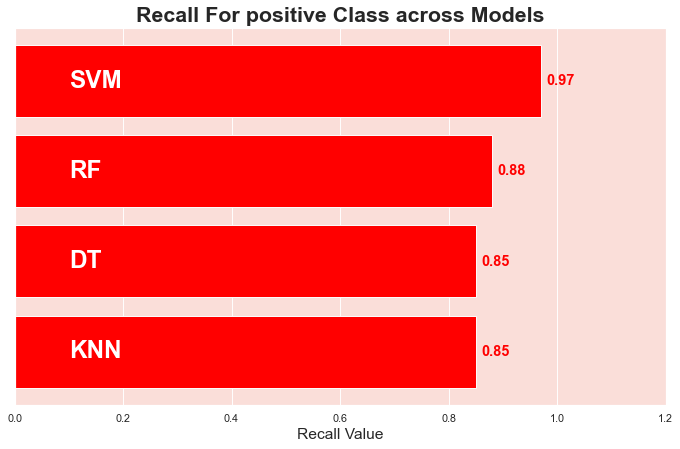

In [51]:
# Graphical Representation
results.sort_values(by = 'recall_1',ascending = True,inplace = True)
recall_1_scores = results['recall_1']

fig,ax = plt.subplots(figsize=(12,7),dpi=70)
ax.barh(results.index,recall_1_scores,color='red')

for i,(value,name) in enumerate(zip(recall_1_scores,results.index)):
    ax.text(value +0.01,i,f"{value:.2f}",ha = 'left',va = 'center',fontweight='bold',color='red',fontsize=15)
    ax.text(0.1,i,name,ha='left',va='center',fontweight='bold',color='white',fontsize=25)

ax.set_yticks([])
ax.set_xlim([0,1.2])

plt.title("Recall For positive Class across Models",fontweight='bold',fontsize=22)
plt.xlabel('Recall Value',fontsize=16)
plt.show()


### Model Comparison (Focus on Recall)

- **SVM**
  - Class 1 recall: 0.97  (excellent at detecting positives)
  - Class 0 recall: 0.57  (misses many negatives)
  - Accuracy: 0.79
  - Highly skewed; favors class 1

- **Random Forest (RF)**
  - Class 0 recall: 0.79, Class 1 recall: 0.88 
  - Accuracy: 0.84
  - Balanced recall and reliable overall

- **KNN**
  - Class 0 recall: 0.82, Class 1 recall: 0.85 
  - Accuracy: 0.84
  - Also balanced, slightly less than RF for class 1

- **Decision Tree (DT)**
  - Class 0 recall: 0.71, Class 1 recall: 0.85
  - Accuracy: 0.79
  - Weaker for class 0; less reliable when minimizing false negatives

